## Language Translator

In [1]:
import nltk

From `nltk` we can download translated sentences between different languages. You can see the example between **English and French** below but feel free to try different combination as well.

In [2]:
nltk.download('comtrans')

[nltk_data] Downloading package comtrans to
[nltk_data]     C:\Users\eric_\AppData\Roaming\nltk_data...
[nltk_data]   Package comtrans is already up-to-date!


True

In [28]:
from nltk.corpus import comtrans
print(comtrans.aligned_sents('alignment-en-fr.txt')[3])

<AlignedSent: 'Please rise , then ,...' -> 'Je vous invite à vou...'>


In [4]:
len(comtrans.aligned_sents('alignment-en-fr.txt'))

33334

## Load Data

In [118]:
import pandas as pd

In [93]:
df = pd.read_csv('align-en-fr1.txt', delimiter='\t', encoding='latin-1', names=['english'])

In [111]:
# separate english texts into one column as the data, french into another column as the labels
df1 = pd.DataFrame()
df1['english'] = df.iloc[::3]
df1.reset_index(inplace=True, drop=True)

In [112]:
df2 = pd.DataFrame()
df2['french'] = df.iloc[1::3]
df2.reset_index(inplace=True, drop=True)

In [114]:
# merge the english and french dataframes together
df3 = pd.merge(df1, df2, left_index=True, right_index=True)

In [117]:
df3

,english,french
0,Resumption of the session,Reprise de la session
1,I declare resumed the session of the European ...,Je déclare reprise la session du Parlement eur...
2,You have requested a debate on this subject in...,Vous avez souhaité un débat à ce sujet dans le...
3,"Please rise , then , for this minute ' s silen...",Je vous invite à vous lever pour cette minute ...
4,( The House rose and observed a minute ' s sil...,"( Le Parlement , debout , observe une minute d..."
...,...,...
33329,"That is an absolute must , especially in an en...","C' est une nécessité absolue , surtout dans un..."
33330,"Mr President , Commissioner , ladies and gentl...","Monsieur le Président , Madame la Commissaire ..."
33331,The report is as good and judicious as Mr Hatz...,Le rapport est aussi bon et circonspect que ne...
33332,Let me also take this opportunity to support h...,"À cette occasion , je voudrais également appuy..."


## Text Preprocessing

In [133]:
import string
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [120]:
# function to remove punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [122]:
df3['eng_nopunct'] = df3['english'].apply(lambda x: remove_punct(x))
df3['fr_nopunct'] = df3['french'].apply(lambda x: remove_punct(x))

df3.head(10)

,english,french,eng_nopunct,fr_nopunct
0,Resumption of the session,Reprise de la session,Resumption of the session,Reprise de la session
1,I declare resumed the session of the European ...,Je déclare reprise la session du Parlement eur...,I declare resumed the session of the European ...,Je déclare reprise la session du Parlement eur...
2,You have requested a debate on this subject in...,Vous avez souhaité un débat à ce sujet dans le...,You have requested a debate on this subject in...,Vous avez souhaité un débat à ce sujet dans le...
3,"Please rise , then , for this minute ' s silen...",Je vous invite à vous lever pour cette minute ...,Please rise then for this minute s silence,Je vous invite à vous lever pour cette minute ...
4,( The House rose and observed a minute ' s sil...,"( Le Parlement , debout , observe une minute d...",The House rose and observed a minute s silence,Le Parlement debout observe une minute de s...
5,"Madam President , on a point of order .","Madame la Présidente , c' est une motion de pr...",Madam President on a point of order,Madame la Présidente c est une motion de proc...
6,You will be aware from the press and televisio...,Vous avez probablement appris par la presse et...,You will be aware from the press and televisio...,Vous avez probablement appris par la presse et...
7,One of the people assassinated very recently i...,L' une des personnes qui vient d' être assassi...,One of the people assassinated very recently i...,L une des personnes qui vient d être assassiné...
8,"Yes , Mr Evans , I feel an initiative of the t...","Oui , Monsieur Evans , je pense qu' une initia...",Yes Mr Evans I feel an initiative of the typ...,Oui Monsieur Evans je pense qu une initiativ...
9,"If the House agrees , I shall do as Mr Evans h...","Si l' Assemblée en est d' accord , je ferai co...",If the House agrees I shall do as Mr Evans ha...,Si l Assemblée en est d accord je ferai comme...


In [123]:
# apply lower to nopunct
df3['eng_nopunct'] = df3['eng_nopunct'].apply(lambda x: x.lower())
df3['fr_nopunct'] = df3['fr_nopunct'].apply(lambda x : x.lower())

df3.head()

,english,french,eng_nopunct,fr_nopunct
0,Resumption of the session,Reprise de la session,resumption of the session,reprise de la session
1,I declare resumed the session of the European ...,Je déclare reprise la session du Parlement eur...,i declare resumed the session of the european ...,je déclare reprise la session du parlement eur...
2,You have requested a debate on this subject in...,Vous avez souhaité un débat à ce sujet dans le...,you have requested a debate on this subject in...,vous avez souhaité un débat à ce sujet dans le...
3,"Please rise , then , for this minute ' s silen...",Je vous invite à vous lever pour cette minute ...,please rise then for this minute s silence,je vous invite à vous lever pour cette minute ...
4,( The House rose and observed a minute ' s sil...,"( Le Parlement , debout , observe une minute d...",the house rose and observed a minute s silence,le parlement debout observe une minute de s...


In [156]:
# instantiate eng_nopunct and fr_nopunct into series for training and testing split later
eng1 = df3['eng_nopunct']
fr1 = df3['fr_nopunct']

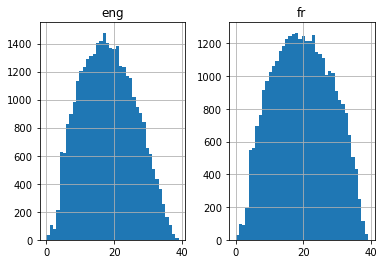

The longest English sentence is 39 words long.
The longest French sentence is 39 words long.


In [131]:
# check distribution of sentence lengths in data

# create empty lists to append sentence lengths into
eng_l = []
fr_l = []

# fill the lists with sentence lengths for graphing
for i in df3['eng_nopunct']:
      eng_l.append(len(i.split()))

for i in df3['fr_nopunct']:
      fr_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'fr':fr_l})

# graph histogram for distribution of sentence lengths
length_df.hist(bins=40)
plt.show()

print('The longest English sentence is', max(eng_l), 'words long.')
print('The longest French sentence is', max(fr_l), 'words long.')

In [155]:
maxlen = 39 # since both english and french have the same length, only need one variable

# create function to tokenize eng_nopunct and fr_nopunct
def tokenizer(lines):
    t = Tokenizer()
    t.fit_on_texts(lines)
    return t

In [161]:
# prepare english tokenizer
eng_tokenizer = tokenizer(eng1)
eng_vocab_size = len(eng_tokenizer.word_index) + 1 # +1 is for embedding layer

print('English vocab size:', eng_vocab_size)

English vocab size: 16870


In [162]:
# prepare french tokenizer
fr_tokenizer = tokenizer(fr1)
fr_vocab_size = len(fr_tokenizer.word_index) + 1 # +1 is for embedding layer

print('French vocab size:', fr_vocab_size)

French vocab size: 22701


In [167]:
# create function to encode and pad sequences
def encoder(tokenizer, length, lines):
    s = tokenizer.texts_to_sequences(lines)
    s = pad_sequences(s, maxlen=length, padding='post')
    return s

## Create Model

In [201]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
import numpy as np

In [165]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(eng1, fr1, test_size=0.2)

In [169]:
# preprocess training and testing data using created preprocessing functions
X_train_enc = encoder(eng_tokenizer, maxlen, X_train)
y_train_enc = encoder(fr_tokenizer, maxlen, y_train)

X_test_enc = encoder(eng_tokenizer, maxlen, X_test)
y_test_enc = encoder(fr_tokenizer, maxlen, y_test)

In [179]:
# create model
model = Sequential()
model.add(Embedding(input_dim=eng_vocab_size, output_dim=512, input_length=maxlen, mask_zero=True))
model.add(LSTM(512, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(fr_vocab_size, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [285]:
history = model.fit(X_train_enc, y_train_enc, epochs=100, batch_size=117, validation_split=0.2)

Epoch 1/100
183/183 [==============================] - 36s 175ms/step - loss: 1.7190 - accuracy: 0.3125 - val_loss: 3.5685 - val_accuracy: 0.0995
Epoch 2/100
183/183 [==============================] - 31s 171ms/step - loss: 1.6884 - accuracy: 0.3197 - val_loss: 3.6193 - val_accuracy: 0.1000
Epoch 3/100
183/183 [==============================] - 30s 166ms/step - loss: 1.6494 - accuracy: 0.3316 - val_loss: 3.6583 - val_accuracy: 0.0988
Epoch 4/100
183/183 [==============================] - 31s 165ms/step - loss: 1.6108 - accuracy: 0.3428 - val_loss: 3.7069 - val_accuracy: 0.0993
Epoch 5/100
183/183 [==============================] - 32s 176ms/step - loss: 1.5732 - accuracy: 0.3541 - val_loss: 3.7569 - val_accuracy: 0.0997
Epoch 6/100
183/183 [==============================] - 31s 168ms/step - loss: 1.5386 - accuracy: 0.3651 - val_loss: 3.7943 - val_accuracy: 0.0985
Epoch 7/100
183/183 [==============================] - 31s 169ms/step - loss: 1.5036 - accuracy: 0.3759 - val_loss: 3.8375 -

## Translate on model

In [367]:
# translate encoded values into words
def get_word(n):
    for i in n[0]:
        k = i
        for key, value in fr_tokenizer.word_index.items():
            if value == k:
                print(key, end=' ')

In [368]:
# create function for prediction
def predict(text):
    t_enc = encoder(eng_tokenizer, maxlen, text)
    pred = model.predict_classes(t_enc)
    pred = get_word(pred)
    return pred

In [469]:
# use prediction function to see what comes out
predict(['every day is pain and suffering'])

chaque jour européenne pourtant et leurs applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements applaudissements 

Problems with the model:

As we can see the model is extremely overfit on the training data. Using predict on the training data itself shows very good results in translating.\
Using words and phrases from the training data produces mixed results. Sometimes it will predict phrases correctly and other times it will be completely wrong.\
Also, the model's use of "applaudissements" (a value of 1251 in encoding) repeatedly shows that it learned to use that word in place of null (a value of 0 in the encoding).